In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, mean_squared_error, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score,  roc_curve, roc_auc_score, precision_recall_curve, auc

# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV , RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from scipy.spatial import distance
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from hyperopt import hp, tpe, Trials, fmin,space_eval
import graphviz
from IPython.display import display


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from hyperopt import hp, tpe, fmin

import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('EEM_df.csv', index_col='date')
df.head()

,USTVOL,BEI,JPYRR,GDPNOW,FINCON,OIL,ECOSURP,USTR,SPXPOS,USTPOS,DXYPOS,AAII,R4WEEM,R2WEEM,EEM_4,EEM_8,EEM_16,EEM_32,EEM_64
date,,,,,,,,,,,,,,,,,,,
2011-09-14,-1.572940,-0.055558,-0.651098,1.798196,0.245111,-1.097728,1.856571,0.488889,0.311000,0.834344,0.444165,-1.585113,1,1,0.000000,0.000000,0.013746,0.105198,0.089947
2011-09-21,-0.387444,-0.461233,0.164507,0.004356,0.056102,-1.093142,-0.389744,-1.021998,-1.598593,1.165909,0.233943,0.110896,0,1,0.000000,0.000000,0.000000,0.000000,0.000000
2011-09-28,2.531801,0.568746,0.257632,-0.062650,-0.018103,-0.158808,-0.203011,1.969365,0.435989,-0.680475,-0.234681,-0.592135,0,0,0.335294,0.342466,0.202703,0.192308,0.110865
2011-10-05,0.334144,-0.331461,0.166958,0.266176,-0.147084,0.233917,1.239351,-0.640622,-0.169199,-0.374285,-0.139999,0.852070,0,0,1.000000,0.416149,0.217180,0.159714,0.094901
2011-10-12,-0.414408,1.524823,1.084317,-0.375892,-0.280339,1.392025,-0.053101,1.563207,-0.081087,0.277890,0.087266,0.398273,0,0,1.000000,1.000000,1.000000,0.572110,0.359551


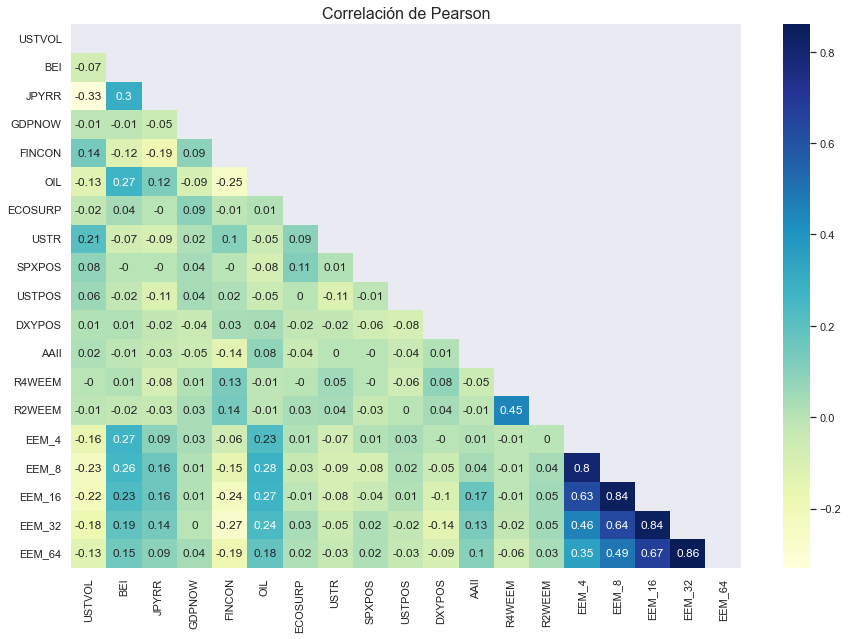

In [3]:
#Correlación de Pearson
plt.figure(figsize = (15,10))
sns.set(font_scale=1)
corr_df = df.corr(method='pearson').round(2)
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='YlGnBu',annot_kws={"size":12}, square = False, mask = mask, alpha = 1)
plt.title('Correlación de Pearson', fontsize=16)
plt.show()

0    0.524351
1    0.475649
Name: R4WEEM, dtype: float64


<AxesSubplot:xlabel='R4WEEM', ylabel='count'>

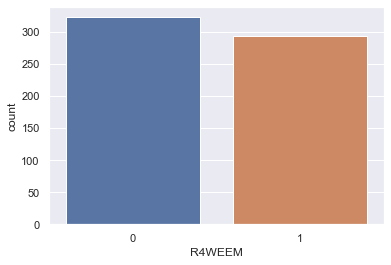

In [4]:
print(df.R4WEEM.value_counts() / df.R4WEEM.value_counts().sum())
sns.countplot( x = 'R4WEEM', data = df)

In [5]:
# Dividir los datos en entrenamiento y testeo
X = df.drop(['R4WEEM', 'R2WEEM'], axis = 1)
y = df.R4WEEM

names = X.columns

Ntest = 100

X_train = X.iloc[:-Ntest]
X_test = X.iloc[-Ntest:]

y_train = y.iloc[:-Ntest]
y_test = y.iloc[-Ntest:]

print(X_train.shape)
print(X_test.shape)


(516, 17)
(100, 17)


# Regresión Logística

Testing accuracy train = 0.5949612403100775
Testing accuracy  test= 0.55
[0.59615385 0.49514563 0.59223301 0.52427184 0.49514563]
Mediana 0.5243
Media 0.5406
Min 0.4951
Max 0.5962
-------------------------------------------------------------------------------------------------------------


Best estimador: {'solver': 'sag', 'penalty': 'none', 'C': 1.8168168168168168}
Testing accuracy train = 0.5988372093023255
Testing accuracy  test= 0.56


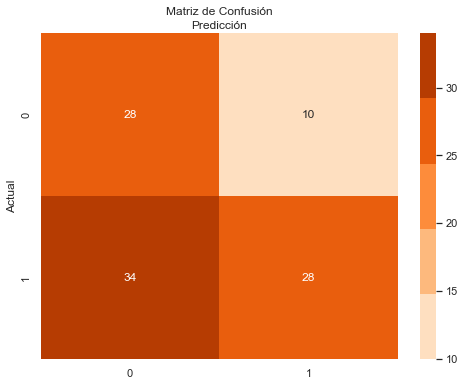

-------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.45      0.74      0.56        38
           1       0.74      0.45      0.56        62

    accuracy                           0.56       100
   macro avg       0.59      0.59      0.56       100
weighted avg       0.63      0.56      0.56       100



In [6]:
random_grid = {'penalty': ["l1","l2", "elasticnet", "none"],
           'C': np.linspace(0,3,1000),
           "solver": ["liblinear", "sag", "saga"]}
cv = StratifiedKFold(n_splits=5,shuffle = False)
Logist = LogisticRegression()
Logist.fit(X_train, y_train)
y_pred = Logist.predict(X_test)
y_train_pred = Logist.predict(X_train)
print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))
scores = cross_val_score(Logist, X_train, y_train, cv=cv, scoring= "accuracy")
print(scores)
print(f'Mediana {np.median(scores).round(4)}')
print(f'Media {np.mean(scores).round(4)}')
print(f'Min {np.min(scores).round(4)}')
print(f'Max {np.max(scores).round(4)}')
print("-------------------------------------------------------------------------------------------------------------")

Logist = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = random_grid,random_state=42, cv=cv)
Logist.fit(X_train, y_train)
print('Best estimador:', Logist.best_params_)
y_pred = Logist.predict(X_test)
y_train_pred = Logist.predict(X_train)
print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("Oranges", n_colors=5)
sns.heatmap(cnf_matrix, annot=True, cmap=colors, fmt='g')
ax.xaxis.set_label_position('top')
ax.set_xlabel('Predicción')
ax.set_ylabel('Actual')
ax.set_title('Matriz de Confusión')
plt.show()
print("-------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred > 0.5))

In [7]:
# Obtener los coeficientes y la importancia de las variables
coefficients = np.abs(Logist.best_estimator_.coef_[0])
importance = coefficients / np.sum(coefficients)

impvariables = pd.DataFrame()

impvariables['Variable'] = names

impvariables['Importancia'] = importance
impvariables.sort_values('Importancia', ascending = False)

,Variable,Importancia
4,FINCON,0.267187
16,EEM_64,0.136576
15,EEM_32,0.130662
10,DXYPOS,0.098479
2,JPYRR,0.058840
0,USTVOL,0.050508
1,BEI,0.048927
7,USTR,0.044828
9,USTPOS,0.035931
14,EEM_16,0.033272


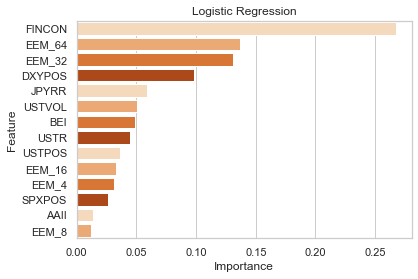

In [8]:
# Establecer estilo con fondo blanco
sns.set_style("whitegrid")

impvariables = impvariables[impvariables.Importancia > 0.01]
impvariables.sort_values('Importancia', ascending = False, inplace = True)

colors = sns.color_palette("Oranges", n_colors=4)

sns.barplot(x='Importancia', y = 'Variable', data = impvariables, palette=colors)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Logistic Regression');

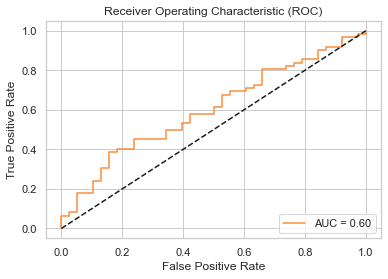

In [9]:
# Obtener las probabilidades predichas en el conjunto de prueba
y_pred_proba = Logist.predict_proba(X_test)[:, 1]

# Calcular el valor de AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Crear el gráfico de la curva ROC con colores personalizados
colors = sns.color_palette("Oranges", n_colors=1)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color=colors[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [10]:
# Definir la función objetivo para la optimización bayesiana
def objective(params):
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': 'ok', 'params': params}

In [11]:
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 100)),
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 10)),
    'min_samples_leaf': hp.choice('min_samples_leaf',range(2,10))
}

In [12]:
trials = Trials()  
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=1000, trials=trials)


  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 1000/1000 [02:14<00:00,  7.44trial/s, best loss: -0.64]


In [13]:
losses = [trial['result']['loss'] for trial in trials.trials]

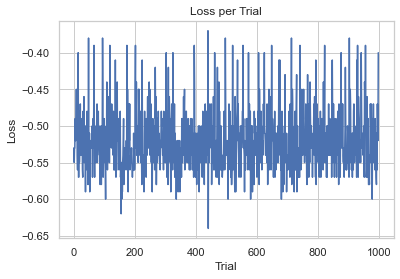

In [14]:
plt.plot(range(len(losses)), losses)
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.title('Loss per Trial')
plt.show()

In [15]:
best_params = space_eval(space, best)
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 27}


In [16]:
# Crear un modelo Random Forest con los hiperparámetros optimizados
modelo = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                               max_depth=best_params['max_depth'],
                               min_samples_split=best_params['min_samples_split'],
                               min_samples_leaf=best_params['min_samples_leaf'])

In [17]:
# Realizar validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(modelo, X_train, y_train, cv=5)

In [18]:
# Obtener la precisión promedio en la validación cruzada
mean_accuracy = np.mean(cv_scores)
mean_accuracy

0.5349327856609409

In [19]:
# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=27)

In [20]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

#Calcular Accuracy
print('Accuracy:', np.mean(y_pred == y_test))

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precisión: {:.4f}".format(precision))

# Calcular el recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.4f}".format(recall))

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score: {:.4f}".format(f1))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE): {:.4f}".format(mse))

# Calcular el área bajo la curva ROC (ROC-AUC)
y_pred_prob = modelo.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Área bajo la curva ROC (ROC-AUC): {:.4f}".format(roc_auc))

Accuracy: 0.45
Precisión: 0.6000
Recall: 0.3387
F1-score: 0.4330
Error cuadrático medio (MSE): 0.5500
Área bajo la curva ROC (ROC-AUC): 0.5208


In [21]:
print(classification_report(y_test, y_pred > 0.5))

              precision    recall  f1-score   support

           0       0.37      0.63      0.47        38
           1       0.60      0.34      0.43        62

    accuracy                           0.45       100
   macro avg       0.48      0.49      0.45       100
weighted avg       0.51      0.45      0.45       100



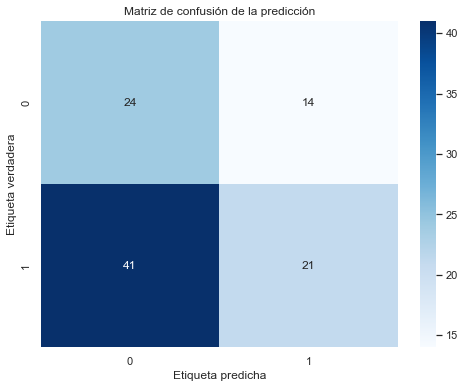

In [22]:
# Crear la matriz de confusión con datos de prueba
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
plt.title('Matriz de confusión de la predicción')
plt.show()

## Importancia de las Variables

In [23]:
# Obtener la importancia de las variables
importances = modelo.feature_importances_

# Obtener los nombres de las variables
feature_names = X.columns

# Crear un DataFrame con las importancias y los nombres de las variables
importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})

# Ordenar las variables por importancia descendente
importance_df = importance_df.sort_values('Importancia', ascending=False)

print(importance_df)


   Variable  Importancia
4    FINCON     0.099417
7      USTR     0.074354
1       BEI     0.071738
2     JPYRR     0.069469
10   DXYPOS     0.068926
16   EEM_64     0.068051
5       OIL     0.065186
0    USTVOL     0.062409
8    SPXPOS     0.057223
11     AAII     0.056597
9    USTPOS     0.055186
6   ECOSURP     0.054777
3    GDPNOW     0.050558
15   EEM_32     0.047548
14   EEM_16     0.040416
13    EEM_8     0.036550
12    EEM_4     0.021596


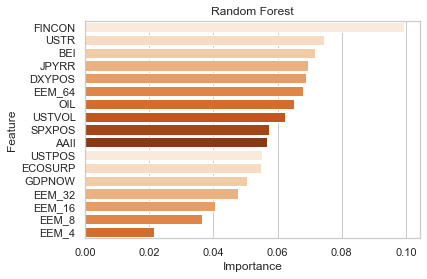

In [24]:
# Establecer estilo con fondo blanco
sns.set_style("whitegrid")

impvariables = importance_df[importance_df.Importancia > 0]

colors = sns.color_palette("Oranges", n_colors=10)

sns.barplot(x='Importancia', y = 'Variable', data = impvariables, palette=colors)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Random Forest');

## Sesgo y Varianza

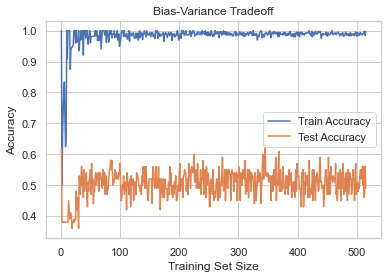

In [25]:
# Inicializar las listas para almacenar las precisiones
train_accuracies = []
test_accuracies = []


# Definir el rango de tamaños de conjunto de entrenamiento
train_sizes = np.arange(1, len(X_train))

# Calcular la precisión para diferentes tamaños de conjunto de entrenamiento
for train_size in train_sizes:
    # Ajustar el modelo Random Forest con los mejores hiperparámetros encontrados
    model = RandomForestClassifier(**best_params)
    model.fit(X_train[:train_size], y_train[:train_size])
    
    # Calcular la precisión del conjunto de entrenamiento y prueba
    train_pred = model.predict(X_train[:train_size])
    train_accuracy = accuracy_score(y_train[:train_size], train_pred)
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Almacenar las precisiones del conjunto de entrenamiento y prueba
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Graficar las precisiones en función del tamaño del conjunto de entrenamiento
plt.plot(train_sizes, train_accuracies, label='Train Accuracy')
plt.plot(train_sizes, test_accuracies, label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Bias-Variance Tradeoff')
plt.show()

# XG Boost

In [26]:
def metricas(y_test,y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cnf = confusion_matrix(y_test, y_pred)
    fig,ax=plt.subplots(figsize=(8,6))
    sns.heatmap(cnf,annot=True,cmap='Blues_r',fmt='g',)
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Actual')
    ax.set_title('Matriz de confusión')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print(classification_report(y_test, y_pred > 0.5))
    print("Confusion Matrix:")

def AUC(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    # Grafica la curva ROC
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [27]:
# Default parameters
Dparams = {
    'booster': 'gbtree', 
    'verbosity': 1, # Verbosity of printing messages. 1 is warning messages.
    'objective': 'binary:logistic', # Classification task
    'subsample': 1, # Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. 
    'colsample_bytree': 1, # Is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
    'eta': 0.3, # Step size shrinkage used in update to prevents overfitting. Shrinks the feature weights to make the boosting process more conservative.
    'max_depth': 6, # Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth.
    'eval_metric': ['logloss','error','auc'],
    'seed': 42} # for reproducible results

In [28]:
# Utilizando la librería XGBoost y los paramétros por default
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

xgb_model = xgb.train(Dparams, dtrain, 300, evals = watchlist,
                      early_stopping_rounds = 50, 
                      verbose_eval = 10
                      )

[0]	train-logloss:0.59189	train-error:0.18411	train-auc:0.89048	test-logloss:0.69299	test-error:0.46000	test-auc:0.56600
[10]	train-logloss:0.25731	train-error:0.00969	train-auc:0.99959	test-logloss:0.72395	test-error:0.46000	test-auc:0.63200
[20]	train-logloss:0.15126	train-error:0.00000	train-auc:1.00000	test-logloss:0.79681	test-error:0.47000	test-auc:0.61078
[30]	train-logloss:0.09338	train-error:0.00000	train-auc:1.00000	test-logloss:0.83417	test-error:0.44000	test-auc:0.60823
[40]	train-logloss:0.06092	train-error:0.00000	train-auc:1.00000	test-logloss:0.83743	test-error:0.45000	test-auc:0.62776
[50]	train-logloss:0.04714	train-error:0.00000	train-auc:1.00000	test-logloss:0.86003	test-error:0.44000	test-auc:0.62436
[59]	train-logloss:0.03864	train-error:0.00000	train-auc:1.00000	test-logloss:0.88025	test-error:0.45000	test-auc:0.62394


In [29]:
y_pred1 = xgb_model.predict(dtest)
y_pred_rounded = np.round(y_pred1)

Precision: 0.717948717948718
Recall: 0.45161290322580644
F1-score: 0.5544554455445545


              precision    recall  f1-score   support

           0       0.44      0.71      0.55        38
           1       0.72      0.45      0.55        62

    accuracy                           0.55       100
   macro avg       0.58      0.58      0.55       100
weighted avg       0.61      0.55      0.55       100

Confusion Matrix:


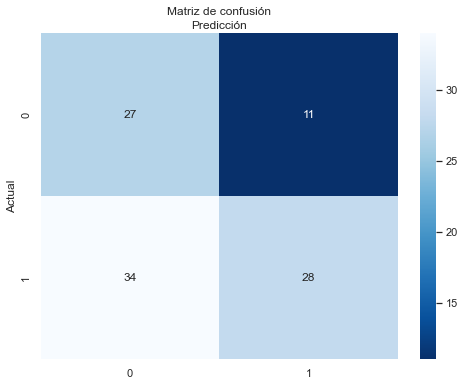

In [30]:
metricas(y_test, y_pred_rounded)

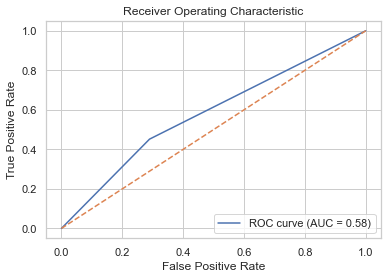

In [31]:
AUC(y_test, y_pred_rounded)

## Optimización de Hiperparámetros

In [32]:
# Definir espacio de búsqueda de hiperparámetros
space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'eta': hp.uniform('eta',0.1, 1),
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1)
}

In [33]:
# Función objetivo para optimización
def objective(params):
    model = xgb.XGBClassifier(
        booster= 'gbtree',
        objective='binary:logistic',
        max_depth=int(params['max_depth']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        eta=params['eta'],
        n_estimators=int(params['n_estimators']),
        random_state=42
    )
    # Entrenar y evaluar el modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': 'ok'}

In [34]:

# Realizar la optimización de parámetros
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=1000,
    )

100%|██████████| 1000/1000 [04:25<00:00,  3.76trial/s, best loss: -0.67]


In [35]:
best_params

{'colsample_bytree': 0.6420305481948128,
 'eta': 0.48173354485577724,
 'max_depth': 5.0,
 'n_estimators': 134.0,
 'subsample': 0.7931362485798589}

In [36]:
# Entrenar el modelo con los mejores parámetros encontrados
final_model = xgb.XGBClassifier(
    booster='gbtree',
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    eta=best_params['eta'],
    eval_metric=['logloss','error','auc'],
    random_state=42
)
final_model.fit(X_train, y_train, eval_set=[(X_train, y_train), 
                    (X_test, y_test)])

[0]	validation_0-logloss:0.62753	validation_0-error:0.33527	validation_0-auc:0.72297	validation_1-logloss:0.71484	validation_1-error:0.51000	validation_1-auc:0.56515
[1]	validation_0-logloss:0.59172	validation_0-error:0.28488	validation_0-auc:0.77772	validation_1-logloss:0.72645	validation_1-error:0.53000	validation_1-auc:0.57194
[2]	validation_0-logloss:0.55121	validation_0-error:0.25581	validation_0-auc:0.83290	validation_1-logloss:0.74369	validation_1-error:0.49000	validation_1-auc:0.56515
[3]	validation_0-logloss:0.46975	validation_0-error:0.17829	validation_0-auc:0.91069	validation_1-logloss:0.73811	validation_1-error:0.45000	validation_1-auc:0.60166
[4]	validation_0-logloss:0.42773	validation_0-error:0.12597	validation_0-auc:0.93503	validation_1-logloss:0.75613	validation_1-error:0.44000	validation_1-auc:0.59550
[5]	validation_0-logloss:0.39446	validation_0-error:0.11434	validation_0-auc:0.94922	validation_1-logloss:0.74898	validation_1-error:0.46000	validation_1-auc:0.61885
[6]	

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6420305481948128, early_stopping_rounds=None,
              enable_categorical=False, eta=0.48173354485577724,
              eval_metric=['logloss', 'error', 'auc'], feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=134, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

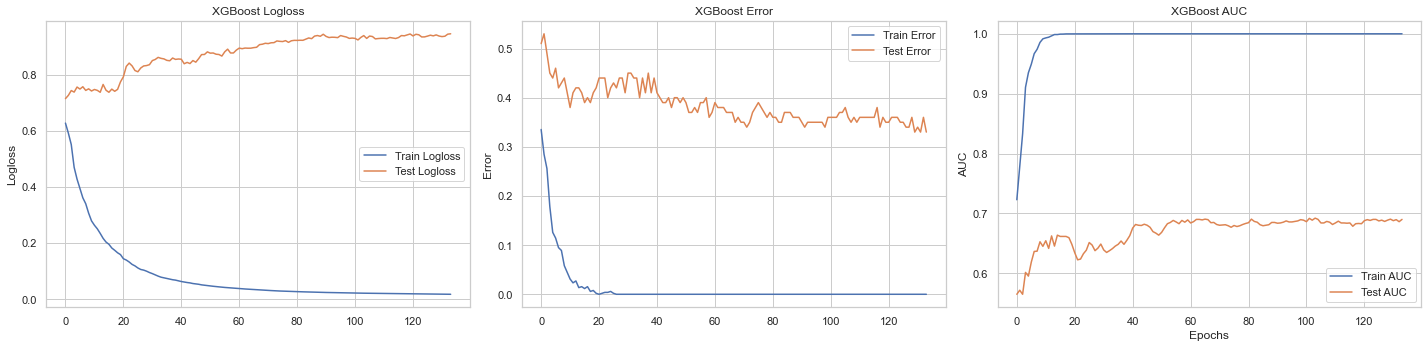

In [37]:
results = final_model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot logloss
ax1.plot(x_axis, results['validation_0']['logloss'], label='Train Logloss')
ax1.plot(x_axis, results['validation_1']['logloss'], label='Test Logloss')
ax1.legend()
ax1.set_ylabel('Logloss')
ax1.set_title('XGBoost Logloss')

# Plot Error
ax2.plot(x_axis, results['validation_0']['error'], label='Train Error')
ax2.plot(x_axis, results['validation_1']['error'], label='Test Error')
ax2.legend()
ax2.set_ylabel('Error')
ax2.set_title('XGBoost Error')

# Plot AUC
ax3.plot(x_axis, results['validation_0']['auc'], label='Train AUC')
ax3.plot(x_axis, results['validation_1']['auc'], label='Test AUC')
ax3.legend()
ax3.set_ylabel('AUC')
ax3.set_title('XGBoost AUC')

plt.xlabel('Epochs')

plt.tight_layout()
plt.show()

Precision: 0.8222222222222222
Recall: 0.5967741935483871
F1-score: 0.6915887850467289
              precision    recall  f1-score   support

           0       0.55      0.79      0.65        38
           1       0.82      0.60      0.69        62

    accuracy                           0.67       100
   macro avg       0.68      0.69      0.67       100
weighted avg       0.72      0.67      0.67       100

Confusion Matrix:


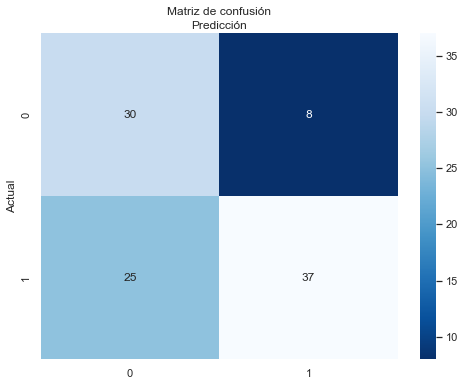

In [38]:
y_pred = final_model.predict(X_test)
y_pred = np.round(y_pred)  # Redondea las predicciones a la clase más cercana (binario)

metricas(y_test,y_pred)

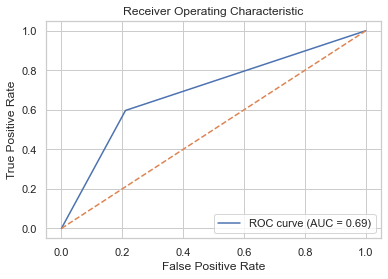

In [39]:
AUC(y_test, y_pred)

## Hiperparámetros con CV

In [40]:

# Definir espacio de búsqueda de hiperparámetros
space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'eta': hp.uniform('eta', 0.1, 1),
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1)
}

# Función objetivo para optimización
def objective(params):
    model = xgb.XGBClassifier(
        booster='gbtree',
        objective='binary:logistic',
        max_depth=int(params['max_depth']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        eta=params['eta'],
        n_estimators=int(params['n_estimators']),
        random_state=42
    )

    # Realizar validación cruzada con TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring=make_scorer(accuracy_score))

    # Calcular la pérdida como el negativo del promedio de la precisión en validación cruzada
    loss = -cv_scores.mean()

    return {'loss': loss, 'status': 'ok'}

# Realizar la optimización de parámetros
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=1000,
)

# Entrenar el modelo con los mejores parámetros encontrados
final_model = xgb.XGBClassifier(
    booster='gbtree',
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    eta=best_params['eta'],
    eval_metric=['logloss', 'error', 'auc'],
    random_state=42
)
final_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

# Evaluar en conjunto de prueba
y_pred = final_model.predict(X_test)
y_pred = np.round(y_pred)  # Redondea las predicciones a la clase más cercana (binario)

# Calcular y mostrar métricas
metricas(y_test, y_pred)


  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]

job exception: name 'make_scorer' is not defined



  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]


NameError: name 'make_scorer' is not defined

## Optimización de max_depth y n_estimators

In [41]:
# Espacio de búsqueda de hiperparámetros
space2 = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1)
}

In [42]:
# Función objetivo para optimización
def objective2(params):
    model = xgb.XGBClassifier(
        booster= 'gbtree',
        objective='binary:logistic',
        max_depth=int(params['max_depth']),
        n_estimators=int(params['n_estimators']),
        colsample_bytree = 0.85,
        eta=0.1,
        subsample=0.8,     
        random_state=42
    )
    # Entrenar y evaluar el modelo
    model.fit(X_train, y_train)
    y_pred3 = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred3)
    return {'loss': -accuracy, 'status': 'ok'}

In [43]:
# Optimización de parámetros
best_params3 = fmin(
    fn=objective2,
    space=space2,
    algo=tpe.suggest,
    max_evals=1000,
    )

  0%|          | 1/1000 [00:00<03:45,  4.44trial/s, best loss: -0.57]

100%|██████████| 1000/1000 [03:58<00:00,  4.19trial/s, best loss: -0.65]


In [44]:
best_params3

{'max_depth': 9.0, 'n_estimators': 202.0}

In [45]:
# Entrenar el modelo con los mejores parámetros encontrados
xgb_final_model = xgb.XGBClassifier(
    booster='gbtree',
    n_estimators=int(best_params3['n_estimators']),
    max_depth=int(best_params3['max_depth']),
    subsample=0.8,
    colsample_bytree=0.85,
    eta=0.1,
    eval_metric=['logloss','error','auc'],
    random_state=42
)
xgb_final_model.fit(X_train, y_train, eval_set=[(X_train, y_train), 
                    (X_test, y_test)])

[0]	validation_0-logloss:0.65617	validation_0-error:0.20930	validation_0-auc:0.86391	validation_1-logloss:0.69022	validation_1-error:0.48000	validation_1-auc:0.60102
[1]	validation_0-logloss:0.62521	validation_0-error:0.13372	validation_0-auc:0.93857	validation_1-logloss:0.69427	validation_1-error:0.45000	validation_1-auc:0.55921
[2]	validation_0-logloss:0.59543	validation_0-error:0.09690	validation_0-auc:0.96727	validation_1-logloss:0.69493	validation_1-error:0.49000	validation_1-auc:0.55157
[3]	validation_0-logloss:0.56768	validation_0-error:0.07364	validation_0-auc:0.97928	validation_1-logloss:0.69552	validation_1-error:0.51000	validation_1-auc:0.55730
[4]	validation_0-logloss:0.54658	validation_0-error:0.05620	validation_0-auc:0.98284	validation_1-logloss:0.70110	validation_1-error:0.48000	validation_1-auc:0.53565
[5]	validation_0-logloss:0.51914	validation_0-error:0.04651	validation_0-auc:0.99175	validation_1-logloss:0.70183	validation_1-error:0.50000	validation_1-auc:0.55772
[6]	

[56]	validation_0-logloss:0.12784	validation_0-error:0.00000	validation_0-auc:1.00000	validation_1-logloss:0.75919	validation_1-error:0.48000	validation_1-auc:0.61121
[57]	validation_0-logloss:0.12574	validation_0-error:0.00000	validation_0-auc:1.00000	validation_1-logloss:0.76015	validation_1-error:0.48000	validation_1-auc:0.61078
[58]	validation_0-logloss:0.12332	validation_0-error:0.00000	validation_0-auc:1.00000	validation_1-logloss:0.76186	validation_1-error:0.47000	validation_1-auc:0.61418
[59]	validation_0-logloss:0.12121	validation_0-error:0.00000	validation_0-auc:1.00000	validation_1-logloss:0.76350	validation_1-error:0.47000	validation_1-auc:0.61290
[60]	validation_0-logloss:0.11902	validation_0-error:0.00000	validation_0-auc:1.00000	validation_1-logloss:0.75900	validation_1-error:0.47000	validation_1-auc:0.61333
[61]	validation_0-logloss:0.11674	validation_0-error:0.00000	validation_0-auc:1.00000	validation_1-logloss:0.75772	validation_1-error:0.45000	validation_1-auc:0.6175

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1,
              eval_metric=['logloss', 'error', 'auc'], feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=202, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

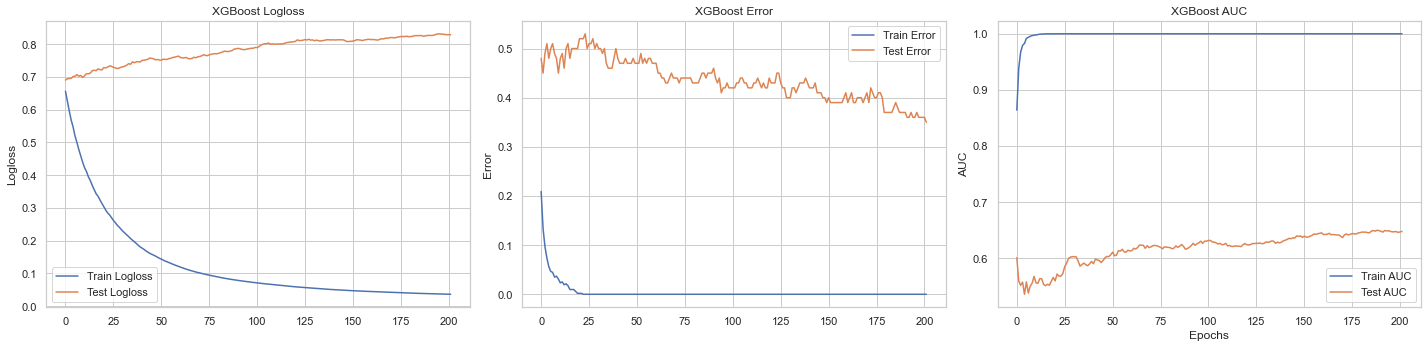

In [46]:
results2 = xgb_final_model.evals_result()
epochs2 = len(results2['validation_0']['logloss'])
x_axis = range(0, epochs2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot logloss
ax1.plot(x_axis, results2['validation_0']['logloss'], label='Train Logloss')
ax1.plot(x_axis, results2['validation_1']['logloss'], label='Test Logloss')
ax1.legend()
ax1.set_ylabel('Logloss')
ax1.set_title('XGBoost Logloss')

# Plot Error
ax2.plot(x_axis, results2['validation_0']['error'], label='Train Error')
ax2.plot(x_axis, results2['validation_1']['error'], label='Test Error')
ax2.legend()
ax2.set_ylabel('Error')
ax2.set_title('XGBoost Error')

# Plot AUC
ax3.plot(x_axis, results2['validation_0']['auc'], label='Train AUC')
ax3.plot(x_axis, results2['validation_1']['auc'], label='Test AUC')
ax3.legend()
ax3.set_ylabel('AUC')
ax3.set_title('XGBoost AUC')

plt.xlabel('Epochs')

plt.tight_layout()
plt.show()

Precision: 0.8292682926829268
Recall: 0.5483870967741935
F1-score: 0.6601941747572816
              precision    recall  f1-score   support

           0       0.53      0.82      0.64        38
           1       0.83      0.55      0.66        62

    accuracy                           0.65       100
   macro avg       0.68      0.68      0.65       100
weighted avg       0.71      0.65      0.65       100

Confusion Matrix:


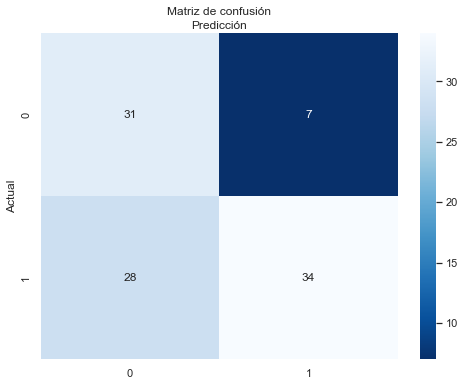

In [47]:
y_pred_n = xgb_final_model.predict(X_test)
y_pred_n = np.round(y_pred_n)  # Redondea las predicciones a la clase más cercana (binario)

# Calcular las métricas
metricas(y_test, y_pred_n)

## Optimización de Hiperparámetros con Cross-Validation

In [48]:
# Definir espacio de búsqueda de hiperparámetros
spaceCV = {
    'max_depth': [int(i) for i in range(1,10)],
    'subsample': [i for i in np.arange(0.1,1,0.1)],
    'colsample_bytree': [i for i in np.arange(0.1,1,1)],
    'eta': [i for i in np.arange(0.01,0.1,0.1)]
}

In [49]:
# Crear un objeto XGBoost Classifier
xgb_model = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic')

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=spaceCV, cv=5, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros y validación cruzada
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_paramsCV = grid_search.best_params_

# Entrenar el modelo final con los mejores hiperparámetros encontrados
final_modelCV = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', **best_paramsCV)
final_modelCV.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [50]:
best_paramsCV

{'colsample_bytree': 0.1, 'eta': 0.01, 'max_depth': 5, 'subsample': 0.1}

Testing accuracy  test= 0.38
Precision: 0.5
Recall: 0.04838709677419355
F1-score: 0.08823529411764706
              precision    recall  f1-score   support

           0       0.37      0.92      0.53        38
           1       0.50      0.05      0.09        62

    accuracy                           0.38       100
   macro avg       0.44      0.48      0.31       100
weighted avg       0.45      0.38      0.26       100

Confusion Matrix:


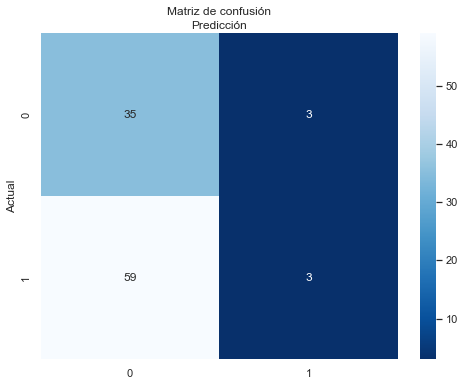

In [51]:
y_predCV = final_modelCV.predict(X_test)
y_predCV = np.round(y_predCV)  # Redondea las predicciones a la clase más cercana (binario)

print("Testing accuracy  test=", accuracy_score(y_test, y_predCV))

metricas(y_test, y_predCV)


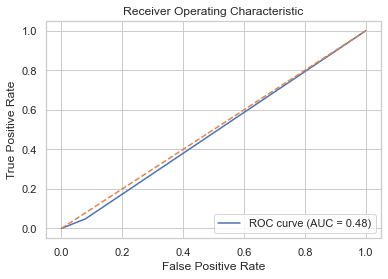

In [52]:
AUC(y_test, y_predCV)

# LSTM

In [53]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [54]:
# Función para crear secuencias
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps+1):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps-1, -1])
    return np.array(X), np.array(y)

# Datos de ejemplo (reemplazar con tus propios datos)
np.random.seed(42)
data = np.random.rand(300, 5)  # 300 filas, 5 columnas
labels = np.random.randint(2, size=300)  # Etiquetas binarias (0 o 1)

# Dividir datos en conjuntos de entrenamiento y prueba
split_index = 200
X_train, X_test = data[:split_index, :], data[split_index:, :]
y_train, y_test = labels[:split_index], labels[split_index:]

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear secuencias para LSTM
n_steps = 3
X_train_seq, y_train_seq = create_sequences(np.hstack((X_train_scaled, y_train.reshape(-1, 1))), n_steps)
X_test_seq, y_test_seq = create_sequences(np.hstack((X_test_scaled, y_test.reshape(-1, 1))), n_steps)

# Asegurarse de que las dimensiones sean correctas
y_train_seq = y_train_seq.reshape((y_train_seq.shape[0], 1))
y_test_seq = y_test_seq.reshape((y_test_seq.shape[0], 1))

# Dividir los datos en conjuntos de entrenamiento y prueba usando TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_train_seq):
    X_train_seq_cv, X_test_seq_cv = X_train_seq[train_index], X_train_seq[test_index]
    y_train_seq_cv, y_test_seq_cv = y_train_seq[train_index], y_train_seq[test_index]

    # Crear modelo LSTM con múltiples capas y Dropout
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, X_train_seq.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo con más épocas
    model.fit(X_train_seq_cv, y_train_seq_cv, epochs=100, verbose=0)

    # Evaluar en conjunto de prueba
    y_pred_proba_cv = model.predict(X_test_seq_cv)
    y_pred_binary_cv = (y_pred_proba_cv > 0.5).astype(int)

    # Calcular métricas de clasificación para este fold
    accuracy_cv = accuracy_score(y_test_seq_cv, y_pred_binary_cv)
    precision_cv = precision_score(y_test_seq_cv, y_pred_binary_cv)
    recall_cv = recall_score(y_test_seq_cv, y_pred_binary_cv)
    f1_cv = f1_score(y_test_seq_cv, y_pred_binary_cv)
    roc_auc_cv = roc_auc_score(y_test_seq_cv, y_pred_proba_cv)

    # Imprimir métricas
    print("Accuracy:", accuracy_cv)
    print("Precision:", precision_cv)
    print("Recall:", recall_cv)
    print("F1 Score:", f1_cv)
    print("ROC AUC Score:", roc_auc_cv)
    print("--------------")


2/2 [==============================] - 0s 0s/step
Accuracy: 0.48484848484848486
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5147058823529411
--------------
2/2 [==============================] - 0s 0s/step
Accuracy: 0.5151515151515151
Precision: 0.5555555555555556
Recall: 0.29411764705882354
F1 Score: 0.3846153846153846
ROC AUC Score: 0.5257352941176471
--------------
2/2 [==============================] - 0s 16ms/step
Accuracy: 0.6060606060606061
Precision: 0.7142857142857143
Recall: 0.5263157894736842
F1 Score: 0.6060606060606061
ROC AUC Score: 0.6917293233082706
--------------
2/2 [==============================] - 0s 0s/step
Accuracy: 0.5454545454545454
Precision: 0.4166666666666667
Recall: 0.38461538461538464
F1 Score: 0.4
ROC AUC Score: 0.5076923076923077
--------------
2/2 [==============================] - 0s 0s/step
Accuracy: 0.5151515151515151
Precision: 0.52
Recall: 0.7647058823529411
F1 Score: 0.6190476190476191
ROC AUC Score: 0.5404411764705883
--------------